In [ ]:
pip install pandas scikit-learn matplotlib numpy

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import SimpleImputer


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_path="/content/drive/MyDrive/population.csv"
population_data=pd.read_csv(data_path)

In [ ]:
numeric_columns = ['India\nGlobal Rank', 'World Population']
population_data[numeric_columns] = population_data[numeric_columns].replace({',': ''}, regex=True)
population_data[numeric_columns] = population_data[numeric_columns].astype(float)

In [ ]:
X = population_data.drop(['Population'], axis=1)
y = population_data['Population']

In [ ]:
# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
X = pd.DataFrame(X_imputed, columns=X.columns)

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

In [ ]:
# Decision Tree
print("Decision Tree Predictions:")
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
print(dt_predictions)

Decision Tree Predictions:
[1.33867678e+09 9.63922588e+08 1.62061920e+09 6.23102897e+08
 1.32451725e+09]


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
import numpy as np

# Calculate accuracy of Decision Tree model
dt_accuracy = dt_model.score(X_test, y_test)
print("Decision Tree Model Accuracy:", dt_accuracy)

# Convert predictions into crores
crore = 10_000_000
dt_predictions_in_crores = dt_predictions / crore

# Print the predictions for all years in the test set
for i, year in enumerate(X_test['Year']):
    print("Year:", year, ", Predicted Population (in crores):", dt_predictions_in_crores[i])

# Calculate error metrics
mae = mean_absolute_error(y_test, dt_predictions)
mape = mean_absolute_percentage_error(y_test, dt_predictions)
rmse = np.sqrt(mean_squared_error(y_test, dt_predictions))

print("Mean Absolute Error (MAE):", mae)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("Root Mean Squared Error (RMSE):", rmse)


Decision Tree Model Accuracy: 0.9747564971140064
Year: 2018.0 , Predicted Population (in crores): 133.8676785
Year: 1990.0 , Predicted Population (in crores): 96.3922588
Year: 2050.0 , Predicted Population (in crores): 162.06192
Year: 1980.0 , Predicted Population (in crores): 62.3102897
Year: 2015.0 , Predicted Population (in crores): 132.4517249
Mean Absolute Error (MAE): 42676382.2
Mean Absolute Percentage Error (MAPE): 0.04898548782369678
Root Mean Squared Error (RMSE): 54250220.858970776


In [ ]:
print("\nRandom Forest Predictions:")
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
print(rf_predictions)


Random Forest Predictions:
[1.35472092e+09 8.66692815e+08 1.55903155e+09 6.52227283e+08
 1.34084420e+09]


In [ ]:
# Train Random Forest model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Make predictions on the test set
rf_predictions = rf_model.predict(X_test)

# Convert predictions into crores
crore = 10_000_000
rf_predictions_in_crores = rf_predictions / crore

# Print Random Forest predictions for all years in the test set
print("\nRandom Forest Predictions:")
for i, year in enumerate(X_test['Year']):
    print("Year:", year, ", Predicted Population (in crores):", rf_predictions_in_crores[i])

# Calculate accuracy of Random Forest model
rf_accuracy = rf_model.score(X_test, y_test)
print("\nRandom Forest Model Accuracy:", rf_accuracy)

# Calculate error metrics
mae_rf = mean_absolute_error(y_test, rf_predictions)
mape_rf = mean_absolute_percentage_error(y_test, rf_predictions)
rmse_rf = np.sqrt(mean_squared_error(y_test, rf_predictions))

# Print error metrics
print("Mean Absolute Error (MAE) for Random Forest:", mae_rf)
print("Mean Absolute Percentage Error (MAPE) for Random Forest:", mape_rf)
print("Root Mean Squared Error (RMSE) for Random Forest:", rmse_rf)



Random Forest Predictions:
Year: 2018.0 , Predicted Population (in crores): 135.03536752
Year: 1990.0 , Predicted Population (in crores): 84.77200029800001
Year: 2050.0 , Predicted Population (in crores): 155.89885678299999
Year: 1980.0 , Predicted Population (in crores): 68.938702256
Year: 2015.0 , Predicted Population (in crores): 134.175921983

Random Forest Model Accuracy: 0.9859694437540091
Mean Absolute Error (MAE) for Random Forest: 29841300.652
Mean Absolute Percentage Error (MAPE) for Random Forest: 0.023537660786860908
Root Mean Squared Error (RMSE) for Random Forest: 40444935.353025414


In [ ]:
# Support Vector Machine (SVR)
print("\nSupport Vector Machine (SVR) Predictions:")
svr_model = SVR()
svr_model.fit(X_train, y_train)
svr_predictions = svr_model.predict(X_test)
print(svr_predictions)


Support Vector Machine (SVR) Predictions:
[1.23428117e+09 1.23428117e+09 1.23428117e+09 1.23428117e+09
 1.23428117e+09]


In [ ]:
# Train SVR model
svr_model = SVR()
svr_model.fit(X_train, y_train)

# Make predictions on the test set
svr_predictions = svr_model.predict(X_test)

# Convert predictions into crores
crore = 10_000_000
svr_predictions_in_crores = svr_predictions / crore

# Print SVR predictions for all years in the test set
print("\nSupport Vector Machine (SVR) Predictions:")
for i, year in enumerate(X_test['Year']):
    print("Year:", year, ", Predicted Population (in crores):", svr_predictions_in_crores[i])

# Calculate accuracy of SVR model
svr_accuracy = svr_model.score(X_test, y_test)
print("\nSupport Vector Machine (SVR) Model Accuracy:", svr_accuracy)

# Calculate error metrics
mae_svr = mean_absolute_error(y_test, svr_predictions)
mape_svr = mean_absolute_percentage_error(y_test, svr_predictions)
rmse_svr = np.sqrt(mean_squared_error(y_test, svr_predictions))

# Print error metrics
print("Mean Absolute Error (MAE) for SVR:", mae_svr)
print("Mean Absolute Percentage Error (MAPE) for SVR:", mape_svr)
print("Root Mean Squared Error (RMSE) for SVR:", rmse_svr)



Support Vector Machine (SVR) Predictions:
Year: 2018.0 , Predicted Population (in crores): 123.42811708677772
Year: 1990.0 , Predicted Population (in crores): 123.42811677286474
Year: 2050.0 , Predicted Population (in crores): 123.42811726957045
Year: 1980.0 , Predicted Population (in crores): 123.42811666110718
Year: 2015.0 , Predicted Population (in crores): 123.42811705551954

Support Vector Machine (SVR) Model Accuracy: -0.030305198797933253
Mean Absolute Error (MAE) for SVR: 299091778.8442085
Mean Absolute Percentage Error (MAPE) for SVR: 0.314342897392903
Root Mean Squared Error (RMSE) for SVR: 346584907.3210087


In [ ]:
# K-Nearest Neighbors (KNN)
print("\nK-Nearest Neighbors (KNN) Predictions:")
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)
print(knn_predictions)


K-Nearest Neighbors (KNN) Predictions:
[1.37092556e+09 9.15114194e+08 1.54313769e+09 6.85139722e+08
 1.32877947e+09]


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

# K-Nearest Neighbors (KNN) Predictions
print("\nK-Nearest Neighbors (KNN) Predictions:")
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)

# Convert predictions into crores
crore = 10_000_000
knn_predictions_in_crores = knn_predictions / crore

# Print the predictions for all years in the test set
for i, year in enumerate(X_test['Year']):
    print("Year:", year, ", Predicted Population (in crores):", knn_predictions_in_crores[i])

# Calculate accuracy of KNN model
knn_accuracy = knn_model.score(X_test, y_test)
print("\nK-Nearest Neighbors (KNN) Model Accuracy:", knn_accuracy)

# Calculate metric errors for KNN model
knn_mae = mean_absolute_error(y_test, knn_predictions)
knn_mape = mean_absolute_percentage_error(y_test, knn_predictions)
knn_rmse = mean_squared_error(y_test, knn_predictions, squared=False)

print("Mean Absolute Error (MAE) for KNN:", knn_mae)
print("Mean Absolute Percentage Error (MAPE) for KNN:", knn_mape)
print("Root Mean Squared Error (RMSE) for KNN:", knn_rmse)



K-Nearest Neighbors (KNN) Predictions:
Year: 2018.0 , Predicted Population (in crores): 137.09255586
Year: 1990.0 , Predicted Population (in crores): 91.51141937999999
Year: 2050.0 , Predicted Population (in crores): 154.3137693
Year: 1980.0 , Predicted Population (in crores): 68.51397218
Year: 2015.0 , Predicted Population (in crores): 132.87794685999998

K-Nearest Neighbors (KNN) Model Accuracy: 0.9796793713957207
Mean Absolute Error (MAE) for KNN: 37719640.43999996
Mean Absolute Percentage Error (MAPE) for KNN: 0.03079870108233706
Root Mean Squared Error (RMSE) for KNN: 48673801.90129779


In [ ]:
# Gradient Boosting Machine (GBM)
print("\nGradient Boosting Machine (GBM) Predictions:")
gbm_model = GradientBoostingRegressor()
gbm_model.fit(X_train, y_train)
gbm_predictions = gbm_model.predict(X_test)
print(gbm_predictions)



Gradient Boosting Machine (GBM) Predictions:
[1.34310558e+09 7.92597589e+08 1.53039685e+09 6.49350893e+08
 1.32392706e+09]


In [ ]:
# Gradient Boosting Machine (GBM) Predictions
print("\nGradient Boosting Machine (GBM) Predictions:")
gbm_model = GradientBoostingRegressor()
gbm_model.fit(X_train, y_train)
gbm_predictions = gbm_model.predict(X_test)

# Convert predictions into crores
crore = 10_000_000
gbm_predictions_in_crores = gbm_predictions / crore

# Print the predictions for all years in the test set
for i, year in enumerate(X_test['Year']):
    print("Year:", year, ", Predicted Population (in crores):", gbm_predictions_in_crores[i])

# Calculate accuracy of GBM model
gbm_accuracy = gbm_model.score(X_test, y_test)
print("\nGradient Boosting Machine (GBM) Model Accuracy:", gbm_accuracy)

# Calculate metric errors for GBM model
gbm_mae = mean_absolute_error(y_test, gbm_predictions)
gbm_mape = mean_absolute_percentage_error(y_test, gbm_predictions)
gbm_rmse = mean_squared_error(y_test, gbm_predictions, squared=False)

print("Mean Absolute Error (MAE) for GBM:", gbm_mae)
print("Mean Absolute Percentage Error (MAPE) for GBM:", gbm_mape)
print("Root Mean Squared Error (RMSE) for GBM:", gbm_rmse)



Gradient Boosting Machine (GBM) Predictions:
Year: 2018.0 , Predicted Population (in crores): 135.62338840642542
Year: 1990.0 , Predicted Population (in crores): 81.96956540262264
Year: 2050.0 , Predicted Population (in crores): 153.588918105751
Year: 1980.0 , Predicted Population (in crores): 69.35556989363661
Year: 2015.0 , Predicted Population (in crores): 131.4169727887445

Gradient Boosting Machine (GBM) Model Accuracy: 0.9766744403748929
Mean Absolute Error (MAE) for GBM: 33975013.98631938
Mean Absolute Percentage Error (MAPE) for GBM: 0.027562452016129474
Root Mean Squared Error (RMSE) for GBM: 52148610.01188744


In [ ]:

pip install tabulate

In [ ]:
from tabulate import tabulate

# Define models and their accuracies
models = ['Decision Tree', 'Random Forest', 'Support Vector Machine', 'K-Nearest Neighbors', 'Gradient Boosting']
accuracies = [dt_accuracy, rf_accuracy, svr_accuracy, knn_accuracy, gbm_accuracy]

# Create a list of lists for the table data
table_data = []
for model, accuracy in zip(models, accuracies):
    table_data.append([model, accuracy])

# Print accuracies in tabular format
print("Model Accuracies:")
print(tabulate(table_data, headers=["Model", "Accuracy"], tablefmt="fancy_grid"))


Model Accuracies:
╒════════════════════════╤════════════╕
│ Model                  │   Accuracy │
╞════════════════════════╪════════════╡
│ Decision Tree          │  0.974756  │
├────────────────────────┼────────────┤
│ Random Forest          │  0.985969  │
├────────────────────────┼────────────┤
│ Support Vector Machine │ -0.0303052 │
├────────────────────────┼────────────┤
│ K-Nearest Neighbors    │  0.979679  │
├────────────────────────┼────────────┤
│ Gradient Boosting      │  0.976674  │
╘════════════════════════╧════════════╛


In [ ]:
from tabulate import tabulate

# Define models and their error metrics
models = ['Decision Tree', 'Random Forest', 'Support Vector Machine', 'K-Nearest Neighbors', 'Gradient Boosting']
mae_values = [mean_absolute_error(y_test, dt_predictions), mean_absolute_error(y_test, rf_predictions),
              mean_absolute_error(y_test, svr_predictions), mean_absolute_error(y_test, knn_predictions),
              mean_absolute_error(y_test, gbm_predictions)]
mape_values = [mean_absolute_percentage_error(y_test, dt_predictions), mean_absolute_percentage_error(y_test, rf_predictions),
               mean_absolute_percentage_error(y_test, svr_predictions), mean_absolute_percentage_error(y_test, knn_predictions),
               mean_absolute_percentage_error(y_test, gbm_predictions)]
rmse_values = [root_mean_squared_error(y_test, dt_predictions), root_mean_squared_error(y_test, rf_predictions),
               root_mean_squared_error(y_test, svr_predictions), root_mean_squared_error(y_test, knn_predictions),
               root_mean_squared_error(y_test, gbm_predictions)]

# Create a list of lists for the table data
table_data = []
for model, mae, mape, rmse in zip(models, mae_values, mape_values, rmse_values):
    table_data.append([model, mae, mape, rmse])

# Print error rates in tabular format
print("Error Rates:")
print(tabulate(table_data, headers=["Model", "MAE", "MAPE", "RMSE"], tablefmt="fancy_grid"))


Error Rates:
╒════════════════════════╤═════════════╤═══════════╤═════════════╕
│ Model                  │         MAE │      MAPE │        RMSE │
╞════════════════════════╪═════════════╪═══════════╪═════════════╡
│ Decision Tree          │ 4.26764e+07 │ 0.0489855 │ 5.42502e+07 │
├────────────────────────┼─────────────┼───────────┼─────────────┤
│ Random Forest          │ 2.98413e+07 │ 0.0235377 │ 4.04449e+07 │
├────────────────────────┼─────────────┼───────────┼─────────────┤
│ Support Vector Machine │ 2.99092e+08 │ 0.314343  │ 3.46585e+08 │
├────────────────────────┼─────────────┼───────────┼─────────────┤
│ K-Nearest Neighbors    │ 3.77196e+07 │ 0.0307987 │ 4.86738e+07 │
├────────────────────────┼─────────────┼───────────┼─────────────┤
│ Gradient Boosting      │ 3.3975e+07  │ 0.0275625 │ 5.21486e+07 │
╘════════════════════════╧═════════════╧═══════════╧═════════════╛


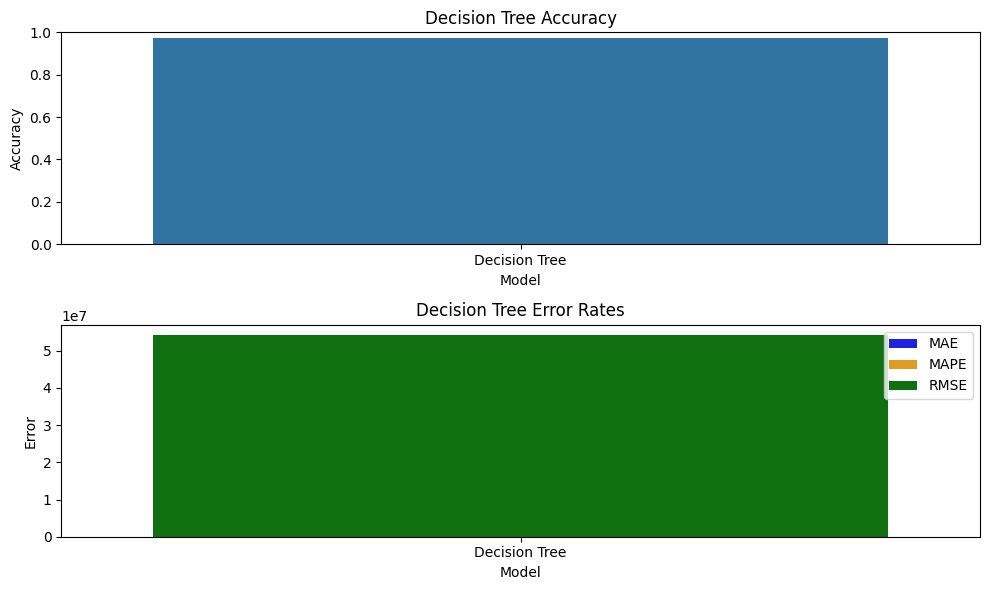

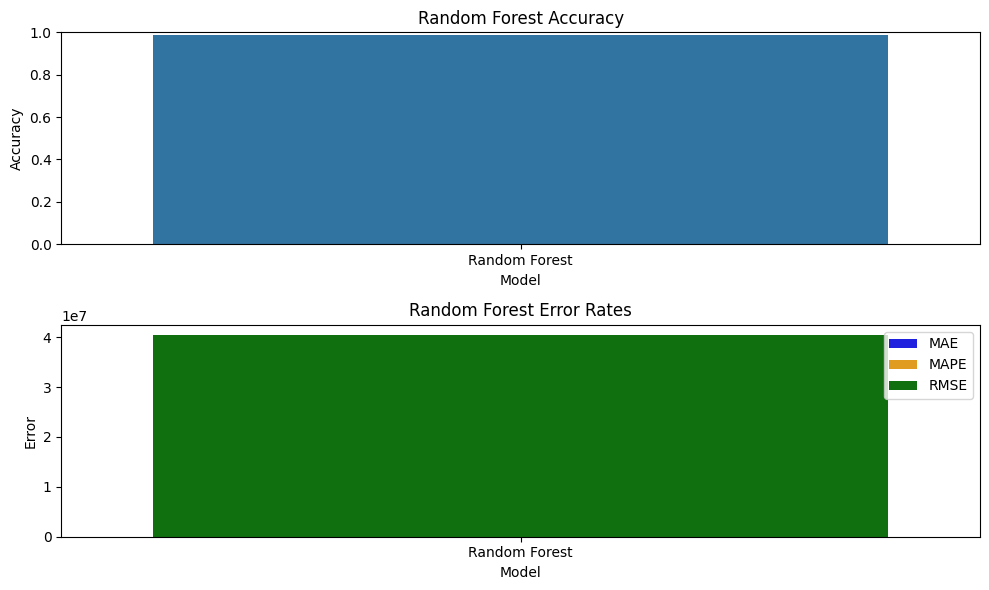

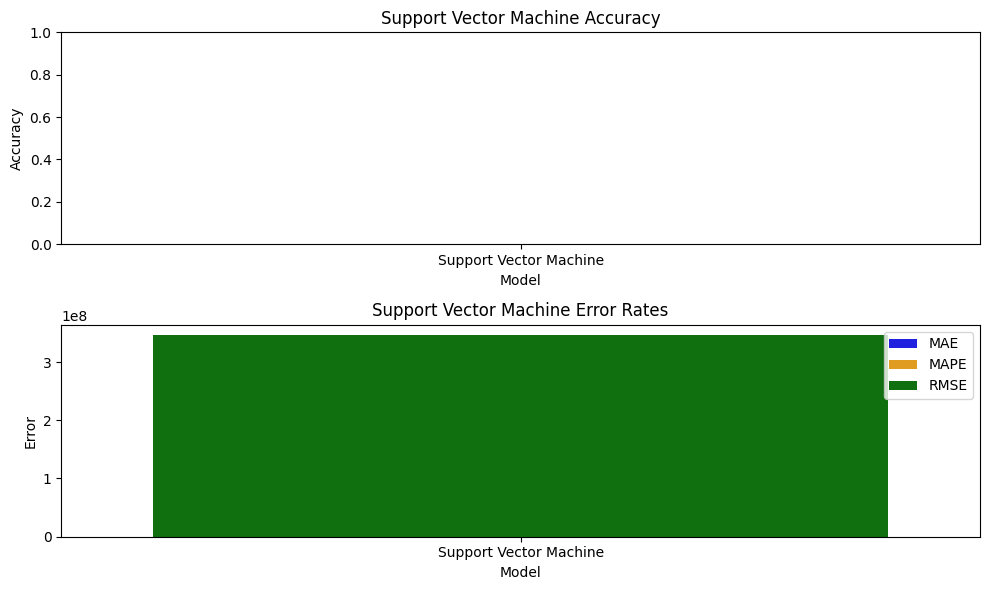

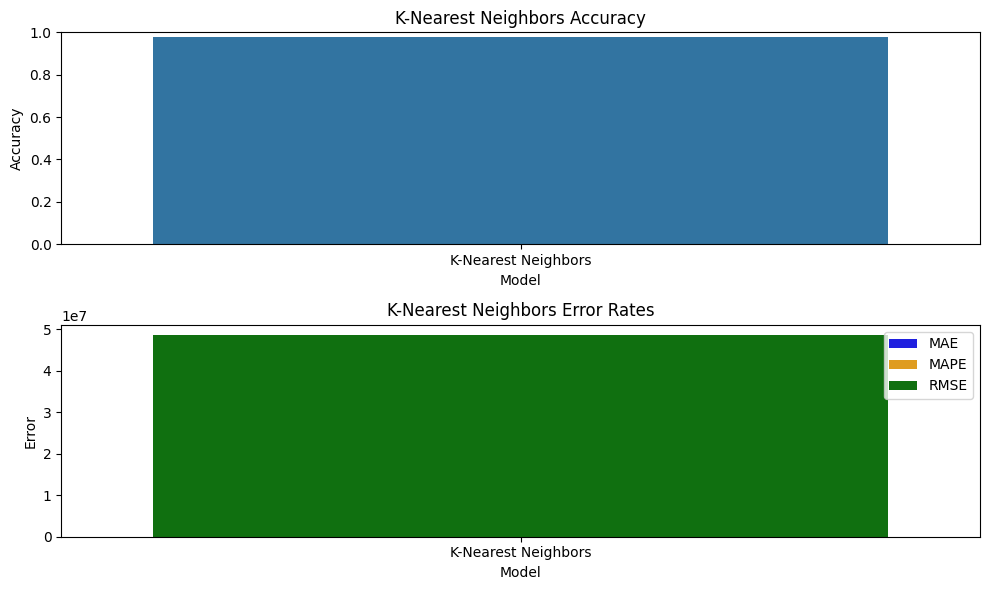

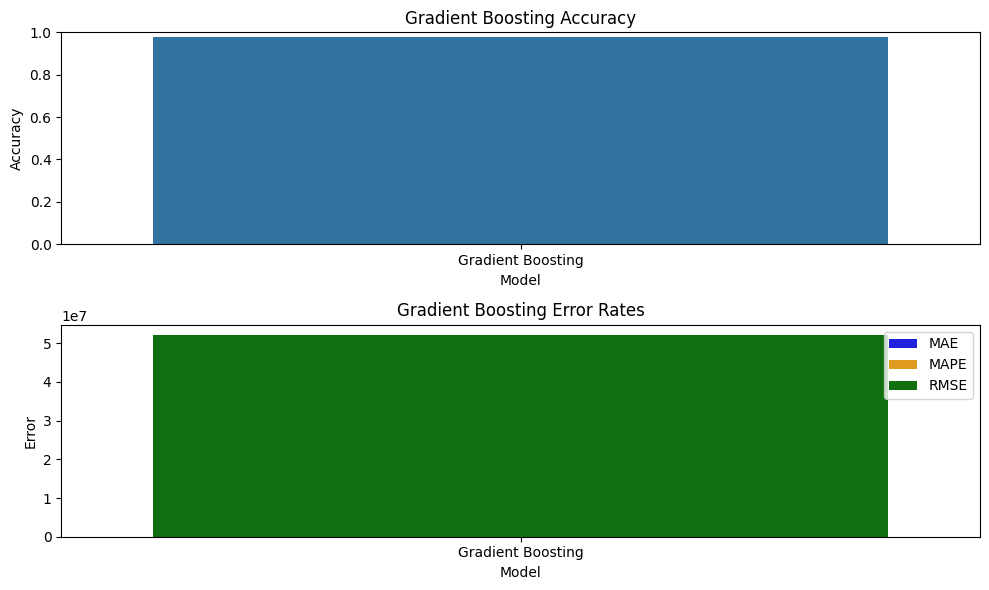

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define models and their results
models = ['Decision Tree', 'Random Forest', 'Support Vector Machine', 'K-Nearest Neighbors', 'Gradient Boosting']
accuracies = [dt_accuracy, rf_accuracy, svr_accuracy, knn_accuracy, gbm_accuracy]

# Calculate error metrics
maes = [mean_absolute_error(y_test, dt_predictions), mean_absolute_error(y_test, rf_predictions),
        mean_absolute_error(y_test, svr_predictions), mean_absolute_error(y_test, knn_predictions),
        mean_absolute_error(y_test, gbm_predictions)]

mapes = [mean_absolute_percentage_error(y_test, dt_predictions), mean_absolute_percentage_error(y_test, rf_predictions),
         mean_absolute_percentage_error(y_test, svr_predictions), mean_absolute_percentage_error(y_test, knn_predictions),
         mean_absolute_percentage_error(y_test, gbm_predictions)]

rmses = [np.sqrt(np.mean((y_test - dt_predictions)**2)), np.sqrt(np.mean((y_test - rf_predictions)**2)),
         np.sqrt(np.mean((y_test - svr_predictions)**2)), np.sqrt(np.mean((y_test - knn_predictions)**2)),
         np.sqrt(np.mean((y_test - gbm_predictions)**2))]

# Plotting accuracy and error rate graphs for each model
for i, model in enumerate(models):
    plt.figure(figsize=(10, 6))

    # Accuracy plot
    plt.subplot(2, 1, 1)
    sns.barplot(x=[model], y=[accuracies[i]])
    plt.title(f'{model} Accuracy')
    plt.xlabel('Model')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)

    # Error rate plot
    plt.subplot(2, 1, 2)
    sns.barplot(x=[model], y=[maes[i]], color='blue', label='MAE')
    sns.barplot(x=[model], y=[mapes[i]], color='orange', label='MAPE')
    sns.barplot(x=[model], y=[rmses[i]], color='green', label='RMSE')
    plt.title(f'{model} Error Rates')
    plt.xlabel('Model')
    plt.ylabel('Error')
    plt.legend()

    plt.tight_layout()
    plt.show()


<ipython-input-82-03abfa706c99>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette='Blues_d')


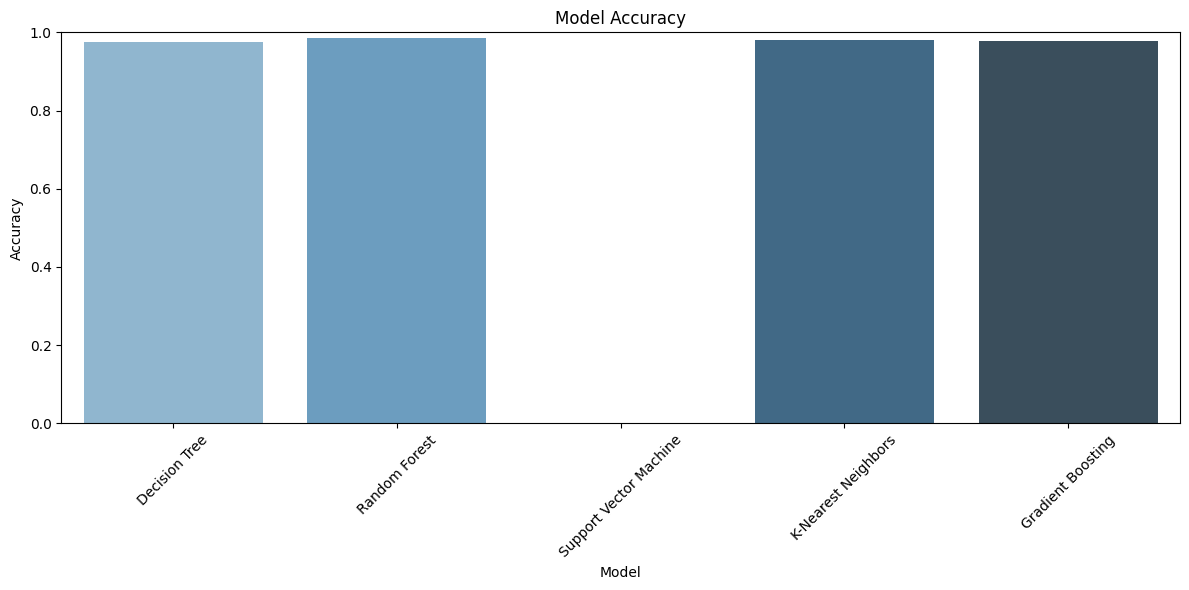

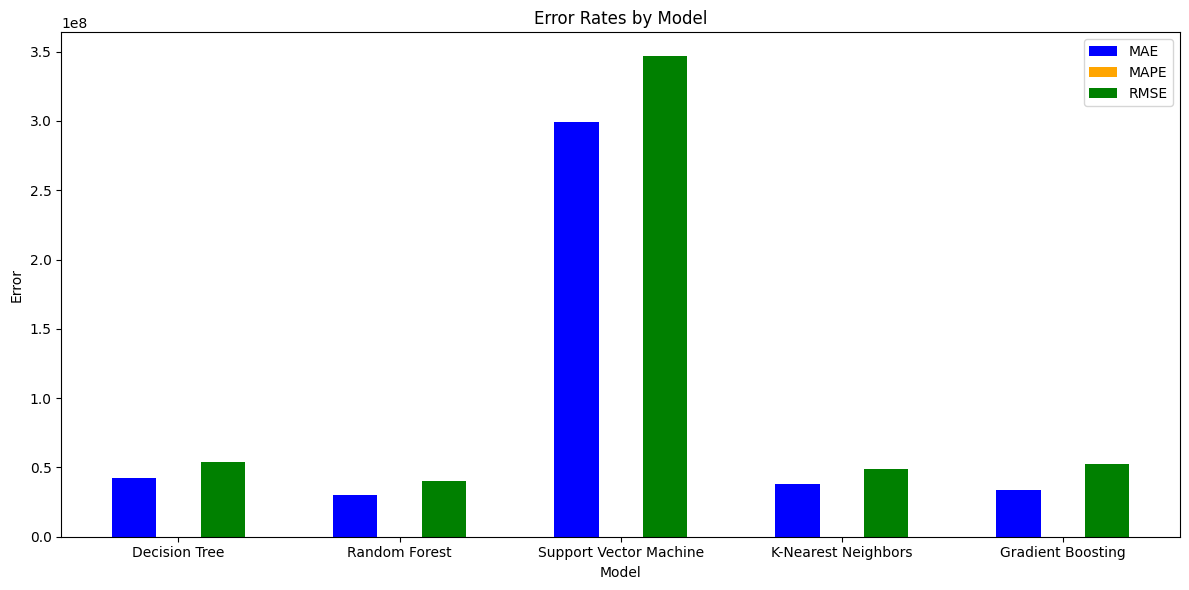

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define models and their results
models = ['Decision Tree', 'Random Forest', 'Support Vector Machine', 'K-Nearest Neighbors', 'Gradient Boosting']
accuracies = [dt_accuracy, rf_accuracy, svr_accuracy, knn_accuracy, gbm_accuracy]

# Calculate error metrics
maes = [mean_absolute_error(y_test, dt_predictions), mean_absolute_error(y_test, rf_predictions),
        mean_absolute_error(y_test, svr_predictions), mean_absolute_error(y_test, knn_predictions),
        mean_absolute_error(y_test, gbm_predictions)]

mapes = [mean_absolute_percentage_error(y_test, dt_predictions), mean_absolute_percentage_error(y_test, rf_predictions),
         mean_absolute_percentage_error(y_test, svr_predictions), mean_absolute_percentage_error(y_test, knn_predictions),
         mean_absolute_percentage_error(y_test, gbm_predictions)]

rmses = [np.sqrt(np.mean((y_test - dt_predictions)**2)), np.sqrt(np.mean((y_test - rf_predictions)**2)),
         np.sqrt(np.mean((y_test - svr_predictions)**2)), np.sqrt(np.mean((y_test - knn_predictions)**2)),
         np.sqrt(np.mean((y_test - gbm_predictions)**2))]

# Plotting accuracy for each model
plt.figure(figsize=(12, 6))
sns.barplot(x=models, y=accuracies, palette='Blues_d')
plt.title('Model Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting error rates for each model
plt.figure(figsize=(12, 6))
bar_width = 0.2
index = np.arange(len(models))

plt.bar(index - bar_width, maes, bar_width, label='MAE', color='blue')
plt.bar(index, mapes, bar_width, label='MAPE', color='orange')
plt.bar(index + bar_width, rmses, bar_width, label='RMSE', color='green')

plt.title('Error Rates by Model')
plt.xlabel('Model')
plt.ylabel('Error')
plt.xticks(index, models)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Define thresholds to discretize the target variable
thresholds = [100, 500, 1000, 2000, 5000]  # Define your thresholds here

# Discretize the target variable
y_test_discrete = pd.cut(y_test, bins=[-np.inf] + thresholds + [np.inf], labels=[f'class_{i}' for i in range(len(thresholds) + 1)])

# Print metrics for each model
for model, prediction in zip(models, predictions):
    # Discretize the predictions
    prediction_discrete = pd.cut(prediction, bins=[-np.inf] + thresholds + [np.inf], labels=[f'class_{i}' for i in range(len(thresholds) + 1)])

    # Calculate and print metrics
    print(f"Metrics for {model}:")
    print(classification_report(y_test_discrete, prediction_discrete))
    print()


Metrics for Decision Tree:
              precision    recall  f1-score   support

     class_5       1.00      1.00      1.00         5

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5


Metrics for Random Forest:
              precision    recall  f1-score   support

     class_5       1.00      1.00      1.00         5

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5


Metrics for Support Vector Machine:
              precision    recall  f1-score   support

     class_5       1.00      1.00      1.00         5

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5


Metrics for K-Nearest Neighbors:
              precision    recall  f1-score   support

